In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import find_boundaries
from skimage.morphology import disk, dilation
from scipy.ndimage import distance_transform_edt
import os

In [1]:
data_path = '/pgeoprj/godeep/ewac_2/seismic_patterns/datasets/public_real_data'
files_names = ['f3_alaudah_label.npy', 'f3_silva_label.npy', 'parihaka_label.npy', 'penobscot_label.npy']
              
for file in files_names:
    data_file = os.path.join(data_path, file)
    if 'f3' in data_file:
        data_name = file.split('_')[0] + '_' + file.split('_')[1]
    else:
        data_name = file.split('_')[0]
    data = np.load(data_file, mmap_mode='r')
    n_inlines = data.shape[0]
    
    boundaries_data = np.zeros(data.shape, dtype=bool)
    
    for i in range(n_inlines):
        img = data[i, :, :]
        boundaries = find_boundaries(img, mode="thick")
        boundaries = dilation(boundaries, disk(1))

        boundaries_data[i, :, :] = boundaries

    boundaries_data = boundaries_data.astype(np.uint8)
    np.save(f'{data_path}/{data_name}_boundaries.npy', boundaries_data)
    print(f'{data_name}_boundaries.npy saved.')

print("Process finished. Ending program.")

(601, 901, 255)
(651, 951, 462)
(590, 782, 1006)
(601, 481, 1501)
Process finished. Ending program.


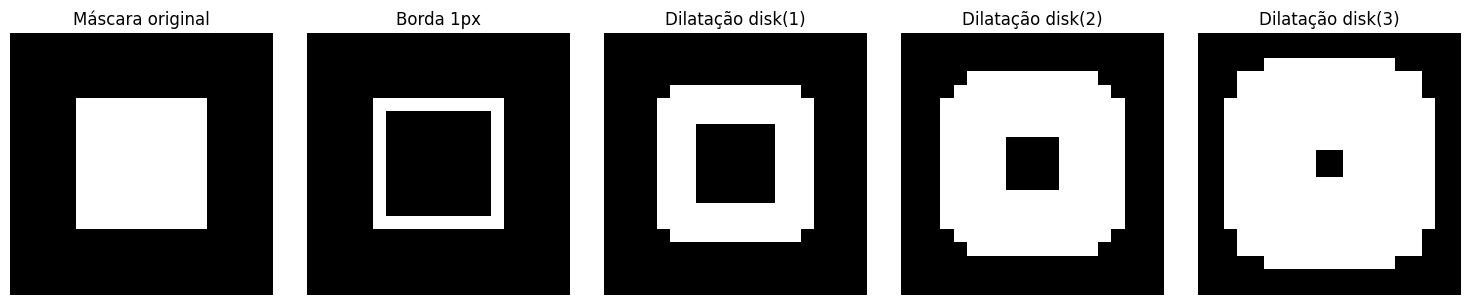

In [1]:
# Criar uma máscara simples (um quadrado no meio)
mask = np.zeros((20, 20), dtype=int)
mask[5:15, 5:15] = 1

# Encontrar as bordas do quadrado
boundaries = find_boundaries(mask, mode="inner")

# Dilatar com discos de diferentes raios
dil_1 = dilation(boundaries, disk(1))
dil_2 = dilation(boundaries, disk(2))
dil_3 = dilation(boundaries, disk(3))

# Plotar os resultados
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
axes[0].imshow(mask, cmap="gray")
axes[0].set_title("Máscara original")

axes[1].imshow(boundaries, cmap="gray")
axes[1].set_title("Borda 1px")

axes[2].imshow(dil_1, cmap="gray")
axes[2].set_title("Dilatação disk(1)")

axes[3].imshow(dil_2, cmap="gray")
axes[3].set_title("Dilatação disk(2)")

axes[4].imshow(dil_3, cmap="gray")
axes[4].set_title("Dilatação disk(3)")

for ax in axes:
    ax.axis("off")

plt.tight_layout()
plt.show()


[5.79092655e-08 9.38391340e-08 1.49684887e-07 1.54336540e-07
 2.34694026e-07 2.49975112e-07 3.61140972e-07 3.98120466e-07
 4.11329125e-07 5.44467003e-07 6.22454566e-07 6.65856889e-07
 8.02799619e-07 9.53674316e-07 1.05858369e-06 1.09625141e-06
 1.15547468e-06 1.42907411e-06 1.62021414e-06 1.64969104e-06
 1.77349516e-06 2.09014974e-06 2.20881768e-06 2.51488657e-06
 2.81372173e-06 2.92166802e-06 2.97730871e-06 3.74200683e-06
 4.12108651e-06 4.36830853e-06 4.63164096e-06 4.72319322e-06
 5.42157823e-06 5.53015291e-06 6.35940622e-06 6.62039839e-06
 7.03390476e-06 7.17789629e-06 7.47556283e-06 7.62939453e-06
 7.78666641e-06 8.99120174e-06 9.76927562e-06 1.04008044e-05
 1.08464127e-05 1.15542291e-05 1.25772793e-05 1.36997166e-05
 1.39970711e-05 1.49321399e-05 1.52587891e-05 1.73899306e-05
 1.94149048e-05 1.98500291e-05 2.07525884e-05 2.12206049e-05
 2.48385668e-05 2.54083546e-05 2.59924795e-05 2.78348927e-05
 2.98213195e-05 3.05175781e-05 3.34863174e-05 3.59207485e-05
 4.13939722e-05 4.554950

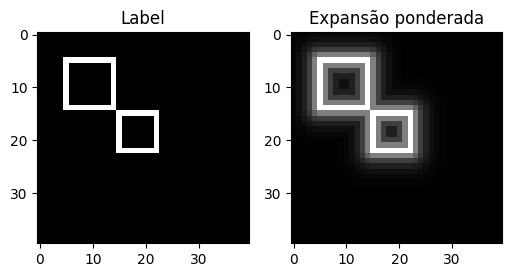

In [32]:
mask = np.zeros((40, 40), dtype=int)
mask[5:15, 5:15] = 1
mask[15:23, 15:23] = 1

# Encontrar as bordas do quadrado
boundaries = find_boundaries(mask, mode="inner")

distance = distance_transform_edt(boundaries == 0)

# Define a função de decaimento: por exemplo, exponencial ou linear
# Aqui usamos decaimento exponencial com base 0.5 por pixel
distance = np.where(boundaries == 1, 1.0, 0.5 ** distance)

# Opcional: cortar a expansão em uma distância máxima (ex: 5 pixels)
max_distance = 4
distance[distance > max_distance] = 0

#print(np.unique(distance))

fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].imshow(boundaries, cmap="gray")
axes[0].set_title("Label")
axes[1].imshow(distance, cmap="gray")
axes[1].set_title("Expansão ponderada")
fig.show()

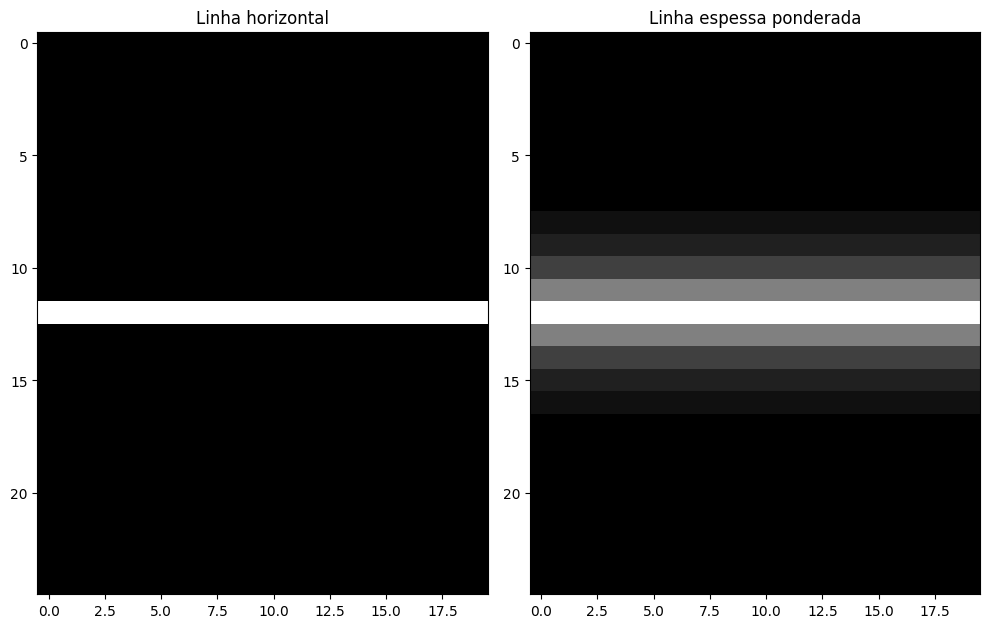

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_edt

# Tamanho da imagem
H, W = 25, 20

# Máscara da linha (centerline)
mask = np.zeros((H, W), dtype=np.uint8)

# Posição vertical da linha
y_line = H // 2

# Linha horizontal fina
mask[y_line, :] = 1

# Distância até a linha
dist = distance_transform_edt(mask == 0)

# Espessura / alcance máximo
max_distance = 4

# Decaimento exponencial
weight = 0.5 ** dist   # ou np.exp(-dist)

# Limite da expansão
weight[dist > max_distance] = 0

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
axes[0].imshow(mask, cmap="gray")
axes[0].set_title("Linha horizontal")
axes[1].imshow(weight, cmap="gray")
axes[1].set_title("Linha espessa ponderada")
plt.tight_layout()
plt.show()
